# Introduction
* In the last section, we looked at the structure of a logistic regression model, and how it is similar to how the brain works in some respects 
### $$y = \sigma(w^Tx)= probability \; of \; certain\;class$$
* The most important part is understanding that linear regression is a linear model
* We have some input features called x which are each weighted by a w, and then they are all added together - this is called a linear combination 
    * Linear combination: In mathematics, a linear combination is an expression constructed from a set of terms by multiplying each term by a constant and adding the results
    * Linear Combination wiki: https://en.wikipedia.org/wiki/Linear_combination
* This is then passed through the sigmoid function, which squashes this output into the range of 0 and 1 
* The question that we did not answer was: 
### How do we find these weights?

## This section is all about finding these weights
* It is also about adding a solid probabilistic foundation to our logistic regression model 
* We will show that every part of the logistic regression model uses probabilistic reasoning 
* So it isn't just mad scientists trying to reconstruct the brain, but rather just applied statistics/probability
* In machine learning this is called **training** 
* In all machine learning models, we have parameters and we have a structure whichs define our model 
* To train a machine learning model, is to find these parameters such that our model learns to be accurate 
* In other we find parameters or weights, so that the thing we are trying to model is actually modeled accurately by our logistic regression model 

---
# Closed form solution to Bayes Classifier
* Before going forward you may want to review these links: 
    * http://rpubs.com/richarddmorey/binomial-beta
    * https://www.countbayesie.com/blog/2015/2/20/random-variables-and-expectation
    * https://www.countbayesie.com/blog/2015/2/21/variance-co-variance-and-correlation
* We are now going to look at a special case of logisitic regression-one that we can find a closed form solution to the problem (in general we cannot, and will have to use gradient descent)
* Here is the problem:
    * Your data is from two classes, and they are both gaussian distributed 
    * They have the same covariance but different means, as we can see from this pictures 

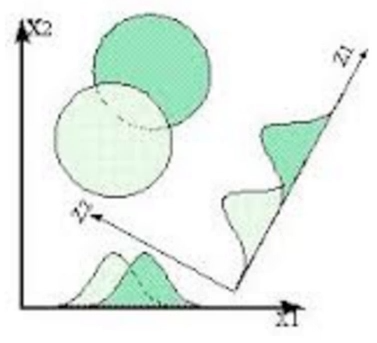

* For this example, we want to be familiar with the multivariate gaussian distribution: https://brilliant.org/wiki/multivariate-normal-distribution/ 

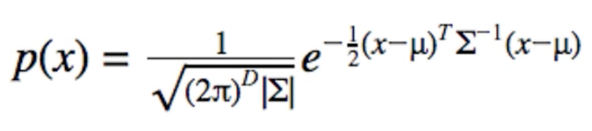

* Where in the above equation, **x** is a vector that is made up of $(x_1, x_2,...,x_n)$
* In other words, it is showing the probability that a point would be found at a specific input of **x**=$(x_1, x_2,...,x_n)$
* Now this **x** vector can also be represented as shown below, where **x = (x, y)**. In this case, x = $x_1$, and y = $x_2$
* this is just a probability distribution that is a function of more than 1 variable - in the image below it is the probability of having a certain x and y value, when both x and y are independently and identically distributed variables

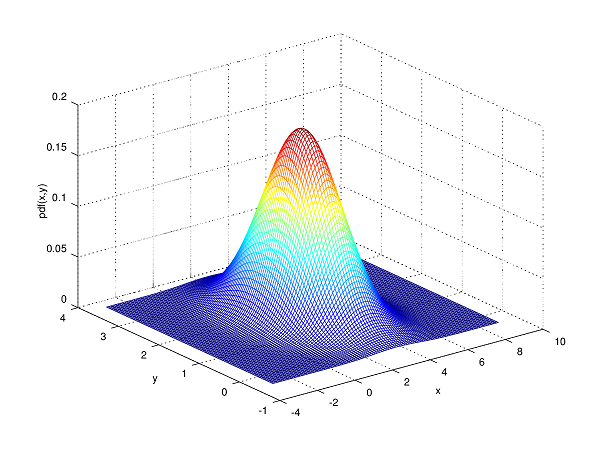

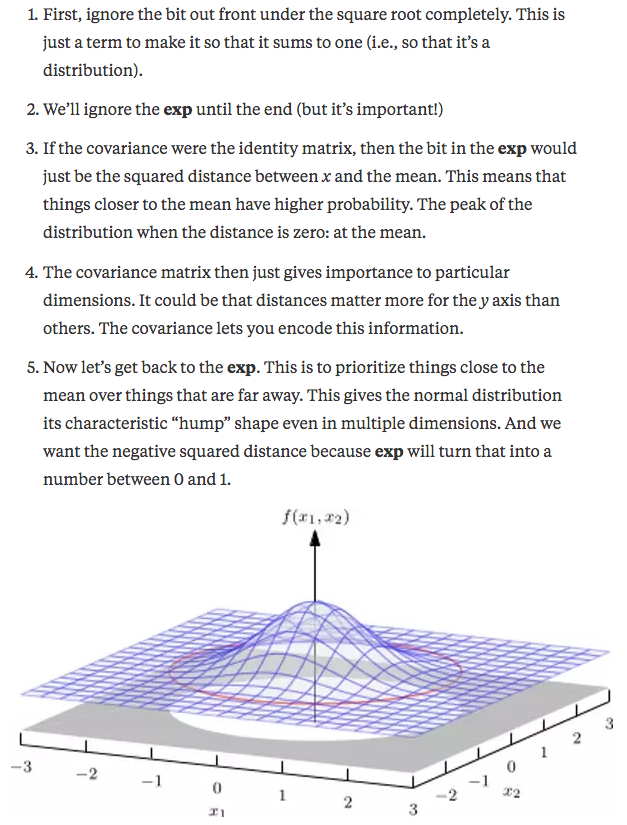

# Bayes Rule
### $$P(Y|X)=\frac{P(X|Y)*P(Y)}{P(X)}$$
* Note that in the above equation, y is representing a class (positive or negative, 1 or 0). It is NOT representing the y from the 3 dimensional image above-that caused me confusion originally.
* Bayes rule states that that:
* The posterior, $P(Y|X)$ is equal to the likelihood, $P(X|Y)$, times the prior, $P(Y)$, divided by $P(X)$. 
* The likelihood part is the gaussian that we just looked at above
    * We can calculate this by taking the data from each class and getting their means and covariances 
    * **NOTE**: there is a gaussian likelihood for both P(X|Y=1) and P(X|Y=0)! 
    * Think, this makes sense because we know that each set of data x (for class y =0 and y=1) has a different mean! Meaning a different gaussian will be produced!
    * Each of these gaussians, which again remember are parameterized by the vector **x**, will return the likelihood of observing the input vector x 
* The prior can just be the maximum likelihood estimate 
    * For example, P(Y=1) would be the number of times class 1 appears divided by the total number of samples
    
# Putting in to logistic regression framework
* The next thing we can do, is take bayes rule for the positive class and expand the bottom portion so it looks like the top portion

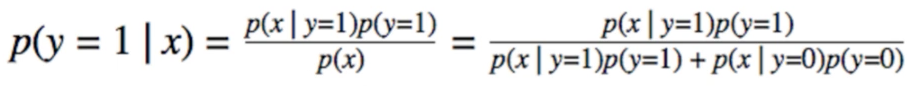

* Next we divide the top and bottom by what is on top

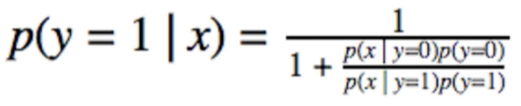

* Now we can see this is starting to look like logistic regression! 

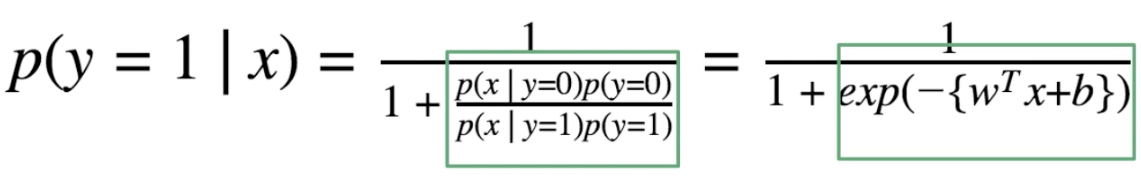

### Note: 
* when we set the two green boxes above equal to eachother, the right hand side (sigmoid) is simply a way of saying: "this is the model I choose for this problem". It is only a manipulation of Bayes rule, and we choose to use the sigmoid model. We could also choose something like: sigmoid(x^TAx + Bx +C) but then it would no longer be logistic regression! 
* Again, the right side is simply saying "I chose this model"
* Also, we chose to solve for p(y=1|x), but we could also solve for p(y=0|x), only that is not customary!
* We see that the negative of the weights times x is equal to the log of the probabilities!

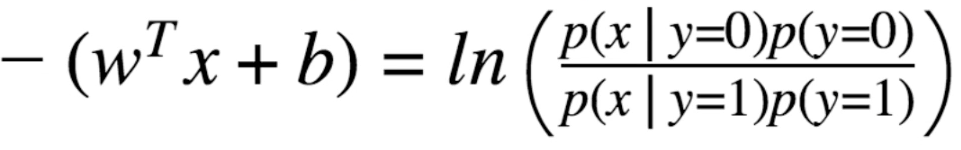

* The next step is to let:

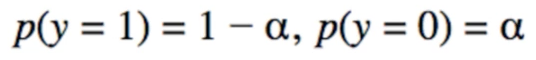

* This is done so that our equations can look a little simpler
* Note, this works because the class y is binary, the only outcome can be a or 1 - a, since probabilities must sum to 1
* We can then expand everything inside the log, since it is all multiplication and division, which gives us the following equation:

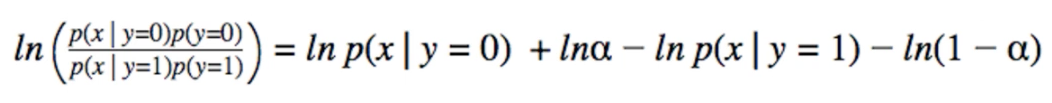

* We can then plug in the gaussian pdf, and immediately see the benefit of taking the log: everything inside the exponential will drop down

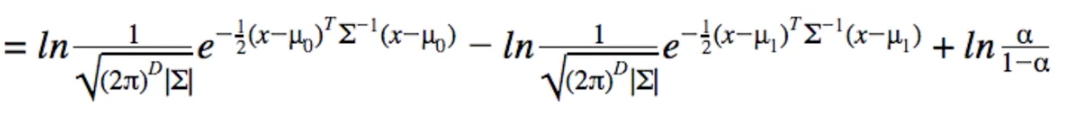

* We can also see that everything inside the square root will cancel out
* Once we have the exponential terms logged out, we can expand them like this: 

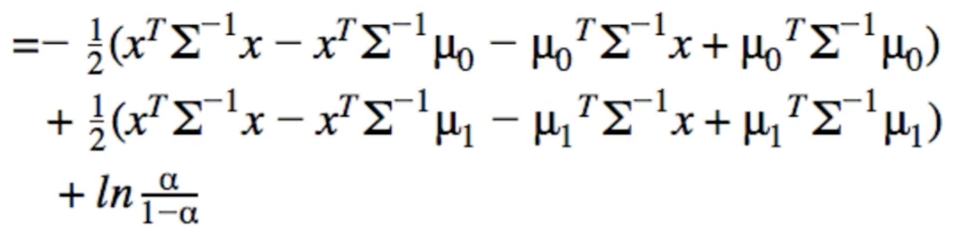

* Now we just have simple sum of products
* Notice the quadratic terms cancel out 
* The question remains though:

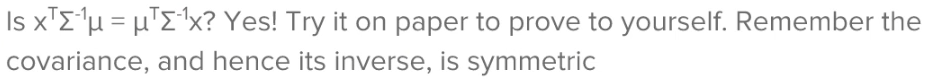

* Recall: The covariance generalizes the concept of variance to multiple random variables. Instead of measuring the fluctuation of a single random variable, the covariance measures the fluctuation of two variables with each other.

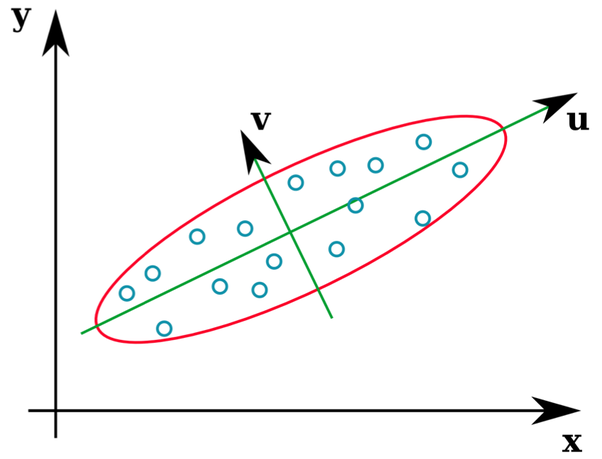

* Okay so once we have multiplied through the 1/2, and collected all of the terms that depend on x and don't depend on x, we arrive here:

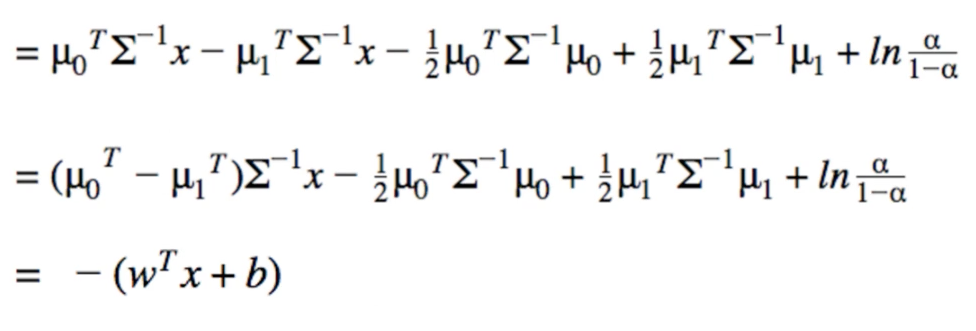

* This looks like our linear classifier form!
* Once again we have one term that depends on x (this correspond to w), and one term that does not depend on x (this term corresponds to b)

* Finally if you split out the terms for w and b, you arrive at these equations:
# Solution!
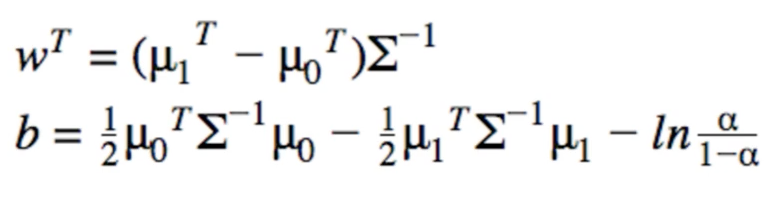

## What does this mean??
### Well, we just found a close form solution to finding the coefficients needed for our logistic regression equation:
# $$y = \sigma(w^Tx)= p(y=1|x)$$

# Our data
* In our coding examples, we are going to use 2 gaussians
* On centered at (-2, -2), and the other centered at (+2, +2)
* The variance of each dimension will be 1, and each dimension will be independent (so any off diagonals in the covariance will be 0)

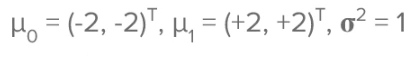

* As an exercise, try to prove that the solution here is w = (4,4), and b = 0 (on paper)
* We are assuming that we have an equal number of samples of both classes 

### A few more notes:
* This method above is also called **linear discriminant analysis (LDA)**
    * in other words, using bayesian analysis to find the linear discriminant that separates two classes
* If the covariance is a diagonal matrix, as in the example above, this is also an instance of naive bayes
* If we have different covariances, then the quadratic terms would no longer cancel out: we would have Quadratic discriminant analysis (QDA)
* This solution is optimal provided the assumptions we made about the distributions are true (generally they are not, so we would want to use gradient descent which is more applicable. 


---
# What do all these symbols mean?
To start with...
## Input Sizes
* N = number of samples we have collected 
    * i.e. I measure the height of 10 students and we find the average height. N = 10
* D = number of dimensions or features per sample
    * i.e. I measure height, weight, girth, and try to predict body fat %. D = 3 (height, weight, girth)
* A matrix of data called X would be an NxD matrix
    * each row is a sample
    * each column is the value of one feature in each sample 
    
## Data and Targets
* Sometimes we say we train a model on inputs X and targets Y
* if we consider all Ys at the same time, then it is an Nx1 matrix (for binary classification, an Nx1 matrix of 0s and 1s) 
* sometimes in this course we will use T for the target instead of Y. 
* the reason we use T instead of Y, is because we now use Y for something else 
    * In particular we use Y for the output of the logistic regression model 
    * remember, the real interpretation of the output of the logistic regression model is the probability of Y =1 given X, i.e. P(Y=1|X)
    * but this takes longer to write so we just shorten this to Y

## Cost function 
* Cost function = error function = objective function
* We want to minimize cost and error 
* But with the objective function, sometimes we create something to maximize, and other times we create something to minimize
* This is just a trivial sign flipping, since minimize X^2 is the same thing as maximizing -X^2
* We will first find something to maximize-what we call the likelihood, that is the probability of the data given a model, P(data|model)
* This is the same as maximizing the log likelihood, which we will call L
    * L = log P(data|model)
* Sometimes we use the letter J for the objective function, and sometimes we just make this the log likelihood, which is something we want to maximize 
    * J = L -> in that case we want to maximize
    * Or J = -L -> this acts as an error, and in that case we want to minimize 

---
# The Cross Entropy Error Function - Theory
* Don't worry about the name, the concept is actually very simple

## Logistic Regression Error
* Recall that in linear regression, we use the squared error objective function
### $$J = \sum_n(t_n - y_n)^2$$
* That is a fine error for a regression function, because it assumes your error is gaussian distributed 
    * that is because log(Gaussian) = squared function
* Of course, that can't work for logistic regression error because:
    * the output is between 0 and 1
    * the targets are only 0 or 1 
    * Hence, that is why we need a different error function - because it will not be gaussian distributed 
* What do we want out of an error function:
    * we want it to be 0 when there is no error
    * and we want it to get larger the more incorrect we are, i.e. more wrong == bigger cost

## Cross Entropy Error
### $$J = -\big[tlog(y)+(1-t)log(1-y)\big]$$
where t = target (remember, either 0 or 1), and y = output of logistic. This is the exact same error function as we saw in andrew NG machine learning course!!!

Remember, only one of these terms will matter, because target is going to be either 1 or 0! If the target is 1, only the first term matters, if the target is 0 only the second term matters. 

Also, recognize that y is a number between 0 and 1, it is the output of the logistic (sigmoid). If we log a number between 0 and 1 we get a number between 0 and -infinity. 

Notice how we take the negative of the entire thing. If we get negative infinity, that will turn into positive infinity. Lets look at a few examples. 

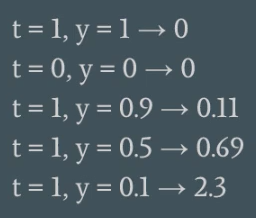

In the first two examples above we are right in our prediction, so we receive 0 error, which is great. As we continue our predictions become worse and worse, and the error increases. This is what we want in an error function!

## Multiple Training Examples
Finally, we want to calculate the total error to optimize across all of the training data simultaneously, so to do that we sum up over all of the individual errors. 

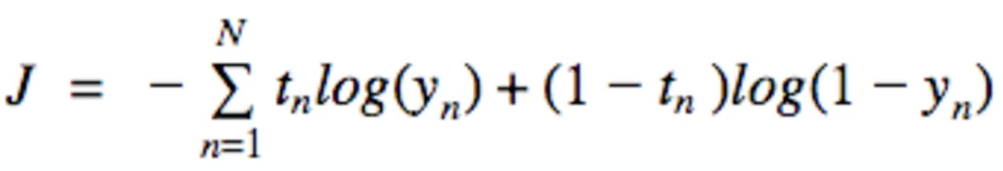

---
# Cross Entropy Error in Code

In [227]:
import numpy as np

# number of examples
N = 100

# number of dimensions
D = 2 

# creating N x D normally distributed data matrix
X = np.random.randn(N,D)

### This time we will need labels because we are going to calculate the error
* Remember, our data is going to make up two gaussians
    * The first is centered at (-2, -2)
    * The second is centered at (2, 2)
* These gaussians will look like: 

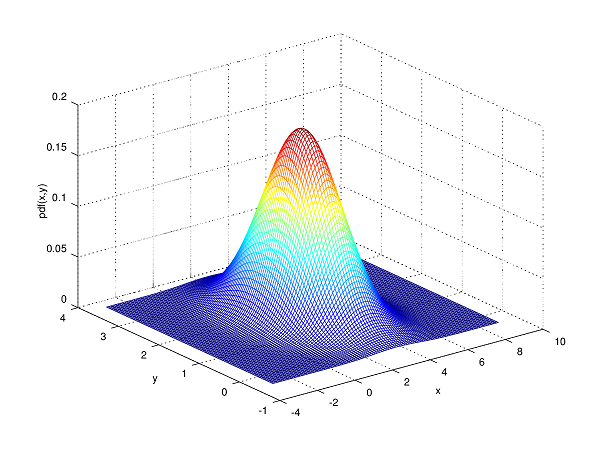

* Remember, the multivariate gaussian equation is going to take in a vector `x` which is made up of components $x_1$, $x_2$, etc. In the image above, $x_2$ is equal to y. 
* also remember, our data is on not what gives the height! That is the pdf, which is based on the mean and covariance associated with our data!

In [228]:
# Set first 50 points to be centered at x = -2 and y = -2 (this is for the second class, y = 0)
X[:50, :] = X[:50, :] - 2*np.ones((50,D))

# Set second 50 points to be centered at x = 2 and y = 2 (this is for the first class, y = 1)
X[50:, :] = X[50:, :] + 2*np.ones((50,D))

Lets take a look at the gaussian cloud that makes up our two classes:
* remember, each separate cloud has its own **multivariate gaussian distribution**!
* That can be used to calculate the likelihood of whether a certain input vector **x** belonged to class y =1, or y =0
* Note: if we weren't using bayes rule we could say that:
### $$P(Y=1|x) = P(x|Y=1)$$
* And we could then say that the probability x is of class y =1 is equal to whichever gaussian (either the one for y =1 or y =0) yields the maximum likelihood
* HOWEVER: what makes bayes rule useful is it also takes into account the **PRIOR**
* in other words, we will also consider how many times overall the class is y =1, aka P(Y=1) and factor that into our estimation!

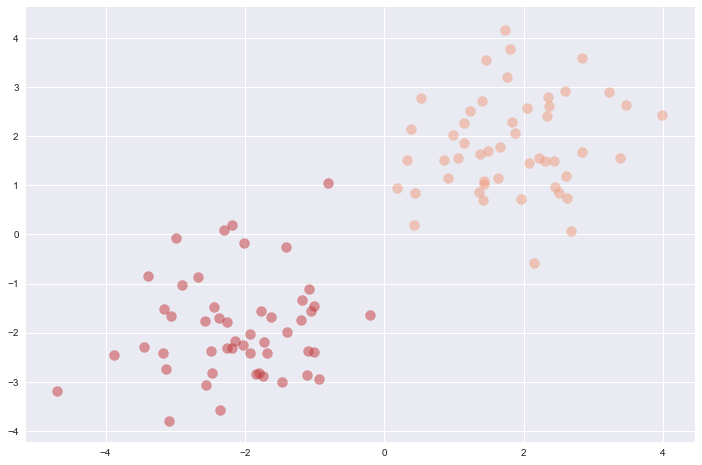

In [229]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,8))

x1 = X[:50, 0]
y1 = X[:50, 1]
x2 = X[50:, 0]
y2 = X[50:, 1]

# Set size to 100, and alpha to .5 to show overlap by transparency
plt.scatter(x1, y1,  s=100, alpha=0.5)
plt.scatter(x2, y2,  s=100, alpha=0.5)

plt.show()

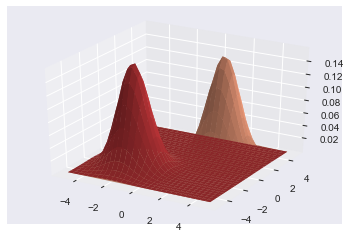

In [230]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal
x, y = np.mgrid[-5.0:5.0:30j, -5.0:5.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])
mu = np.array([-2, -2])
sigma = np.array([1, 1])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)


xy1 = np.column_stack([x.flat, y.flat])
mu1 = np.array([2, 2])
sigma1 = np.array([1, 1])
covariance1 = np.diag(sigma**2)

z1 = multivariate_normal.pdf(xy1, mean=mu1, cov=covariance)

# Reshape back to a (30, 30) grid.
z1 = z1.reshape(x.shape)


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(x,y,z)
ax.plot_surface(x,y,z1)

#ax.plot_wireframe(x,y,z)

plt.show()

The two gaussians above represent the gaussians associated with P(x|y=0) and P(x|y=1)! They can be used in the likelihood calculation, along with the prior. 

### Now lets create out array of targets

In [231]:
T = np.array([0]*50+[1]*50)

### Account for the bias term
* lets concatinate a column of ones to the original matrix
* remember, this is to account for the bias term

In [232]:
ones = np.array([[1]*N]).T
Xb = np.concatenate((ones, X), axis=1)

### Randomly initialize a weight vector

In [233]:
# must be of length D + 1 to account for bias term 
w = np.random.randn(D + 1)

### Calculate dot product between each row of X and w 
* could do in a for loop
* But it is much more efficient to use numpy's built in matrix multiplication
* In numpy, `*` means element wise multiplication
* In order to do matrix multiplcation, must use function `dot`

In [234]:
z = Xb.dot(w)

### Apply the sigmoid
* Y below is going to be our prediction outputs! 
### $$y = \sigma(w^Tx)= probability \; of \; certain\;class$$

In [235]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [236]:
Y = sigmoid(z)

### Define a function to calculate cross entropy error
* We can see from the equation below, the cross entropy error only depends on the targets and the weights
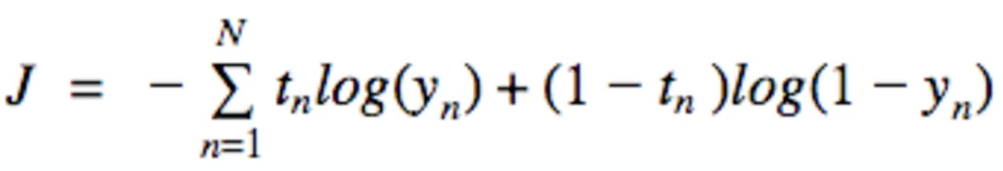

In [237]:
def cross_entropy(T, Y): 
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [238]:
print(cross_entropy(T, Y))

447.174930425


So the value above is the cross entropy error we received when we randomly selected our weights!

Next we are going to look into using the closed form solution to find the optimal weights! 

Note: We still haven't performed any "training" yet. Even utilizing the closed form solution, the cross entropy error (cost) that we end up with is found with no iterative training process! That is yet to come...

## Lets try to use the closed form solution to logistic regression  
* We can see how good that solution is 
* Remember, we can use the closed solution because we have equal variances for both classes
    * variance is equal to 1, which is default for a numpy random normal
    * hence, the weights depend only on the means

### Multivariate Gaussian Distribution
* Let's make sure we understand exactly what is going on here
* We are dealing with **two** multivariate gaussian distributions, described below

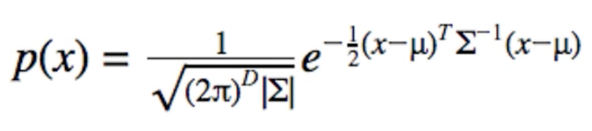

* These equations will **NOT** be defined as p(x), but rather:
#### First Distribution, centered at (-2,-2), the data for the negative class
### $$ P(X\;|\;Y=0)$$
#### And the Second Distribution, centered at (2, 2), the data for the positive class
### $$P(X \;|\; Y=1)$$
* Each distribution will have its own mean! 
* These respective means, $\mu_1$ and $\mu_0$ are what the closed form solution below depends on 
* Also, the closed form solution is based on $P(X \;|\; Y=1)$, but that is by convention. It does not need to be that way.
### Closed Form Solution 

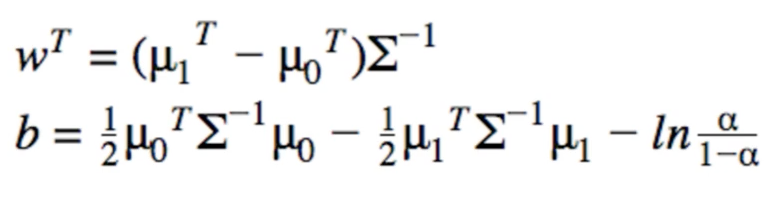

### Lets determine the parameters to the closed form solution
* in other words, lets take a second to find what w and be should evaluate too in this closed form example
* Remember what the two gaussians we are dealing with look like:

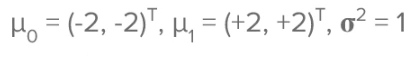

## Start by defining our means and covariance

In [239]:
mean0 = np.matrix([-2,-2])
mean1 = np.matrix([2,2])

# covariance has 1's along diagonal and 0's elsewhere
covar = np.matrix([[1,0],[0,1]])

In [240]:
mean0, mean1

(matrix([[-2, -2]]), matrix([[2, 2]]))

In [241]:
covar

matrix([[1, 0],
        [0, 1]])

## Based on the closed form solution above, calculate w and b

In [242]:
w = (mean1-mean0)*covar

In [243]:
b = (0.5 * mean0 * covar * mean0.T) - (0.5 * mean1 * covar * mean1.T) 

In [244]:
weights = np.concatenate((b,w), axis=1)

In [245]:
weights = weights.T

## We now have our closed form solution weights
* Awesome! This is generally done by using gradient descent to update the weights until they converge to an optimal value
* However, the weights array above now contains the best values that that weights can take on 
* Remeber, that weights array is really: `b`, `w1`, `w2`, which will be multiplied by `bias term`, `x1`, `x2`
    * note, in this case `x2` is referred to as `y`
    
### Note:
* It may be confusing as to what just happened, but keep in mind the step below of the derivation we went through earlier:

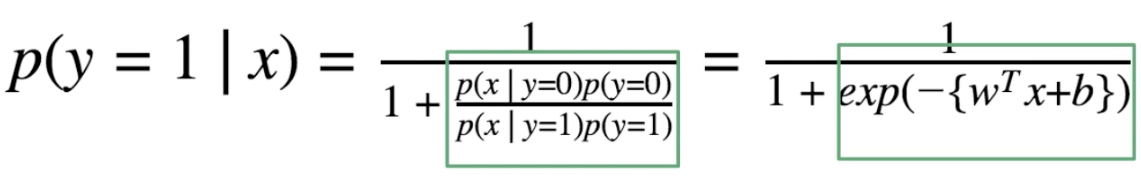

* Our goal is to determine a way, when given an input `x`, to calculate the probability that the class of input vector `x` is `y=1`.
* In the past the main way's we have accomplished that has been through iterative update algorithms such as gradient descent
* However, we have been able to show here that we found a way to do this with a closed form solution.

> 1. We began with Bayes rule
  2. Because we have two classes, y=1 and y=0, we have two gaussian likelihoods based on the multivariate normal distribution. Each class (y=0, y=1) has its own distribution. 
  3. We start solving for the positive class in the bayes equation
  4. The equation begins to look like logistic regression
  5. We set the bottom portion from the bayes equal to that from logistic regression. This is our **choice**. We are specifically choosing to have the sigmoid be the model that we use. 
  6. We solve for the weight and bias term 
  
* The main thing to remember is that once those terms are found, we can use them to solve for P(Y = 1| X)!!!!

## Calculate our new predictions!

In [246]:
z = Xb.dot(weights)
Y = sigmoid(z)

## And finally, lets calculate the Cross Entropy Error
* Remember, Y is a column vector of 100 x 1 
* Cross entropy function is going to take in all 100 predictions from Y vector, and run through determine the cross entropy error compared to the target column vector (100 x 1)

In [247]:
print(cross_entropy(T, Y))

[[ 1.35397704]]


---
# Visualizing the Linear Discriminant/Bayes Classifier/Gaussian Clouds
* Lets now take a second to visualize the Bayes solution that we just created
* So recall, we have two gaussian clouds:
    * one centered at (-2,-2)
    * the other centered at (2,2)
    
## Scatterplot
* Based on our closed form solution from above, we should get a line: $y = -x$
* To show this, remember:
### $$w^T + b = w_1x_1 + w_2x_2 + b = 4*x_1 + 4*x_2 + 0$$
### $$x_1 = -x_2$$
And because x_2 is equivalent to y in this case:
### $$x_1 = -y$$ 

In [248]:
import matplotlib.pyplot as plt
%matplotlib inline

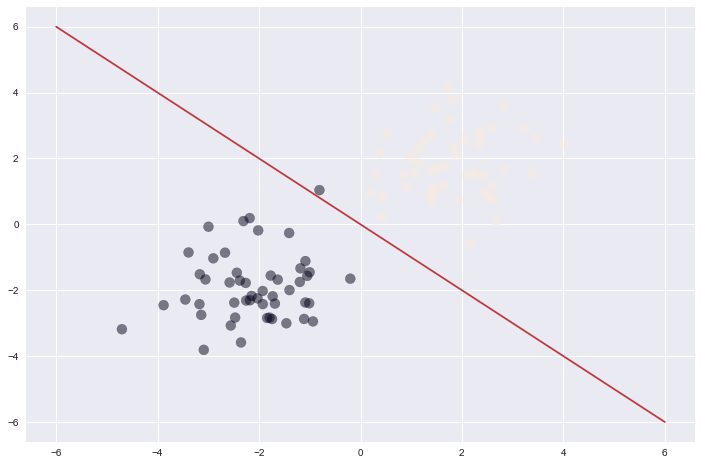

In [249]:
fig, ax = plt.subplots(figsize=(12,8))

# Set color of scatter plot to Targets, set size to 100, and alpha to .5 to show overlap by transparency
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)

# lets draw the line
x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis

plt.plot(x_axis, y_axis)
plt.show()

### We can clearly see above, our two gaussian clouds, and our linear discriminating line! 

---
# Maximizing the Likelihood
As a lead in to the logistic problem, we are going to talk about how to calculate the likelihood for a biased coin.

## Setup:
* we have a coin with a probability of heads, p(H), equal to p
### $$p(H) = p$$
* in this case p is a parameter 
* The probability of tails of course, because this is a bernoulli trial, is
### $$p(T) = 1 - p$$

## Experiment
* So we are going to do an experiment to help us determine p
* we flip a coin 10 times, and we get 7 heads and 3 tails 
* we want to know how we would write the total likelihood, which is the probability of seeing the result that we saw 

## Likelihood
The general form equation for the likelihood of a binomial experiment is:
### $$L(X|p) = p^k*(1-p)^{N-k}$$
* Where k is the number of success's 
* N is the total number of trials
* In our situation, we had:
    * 7 heads, so 7 success's
    * 3 tails, so 3 failures
    * 10 trials total
* The likelihood function then looks like:
### $$L(X|p) = p^7*(1-p)^3$$
* Note that we are able to do this because each coin toss is independent! Therefore we can multiply each probability 
* Also, note: the likelihood can look just like a conditional probability. The likelihood is used when our data, in this case x, has already been observed!

## Maximize the likelihood
* Now what we want to do here is maximize L with respect to P
* in other words we want to choose a p that maximizes L
* Of course to do this, we can use calculus!
* Note: in most of these problems we take the log and maximize the log likelihood
    * this is acceptable because the log function is monotinically increasing 
    * this means that the point at which the likelihood is maximum, the log likelihood is also maximum
* lets first take a look at our likelihood function, to get some intuition for what we may be expecting!

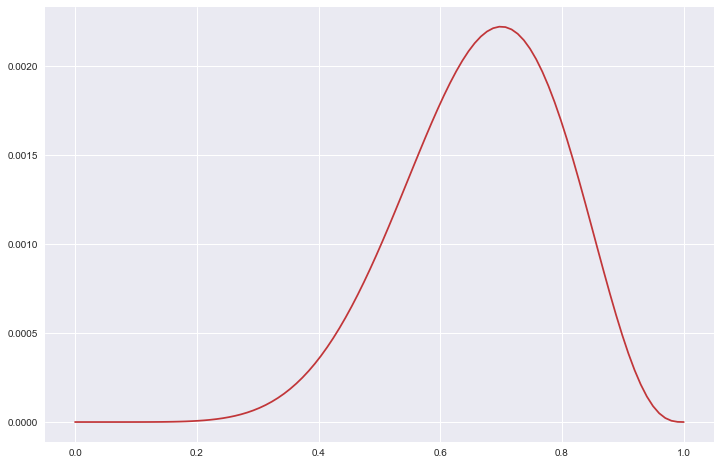

In [250]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.linspace(0, 1, 100)
y = np.power(x, 7)*np.power(1-x,3)
plt.plot(x, y)
plt.show()

* Ahah! So it looks like from a visual perspective, we should be expecting a value of ~0.7 to be the value of p that maximizes our likelihood of observing our data

## Lets begin the derivation! First we will take the log likelihood
### $$log(L) = l = log\Big(p^7*(1-p)^3\Big)$$
* then use the multiplication rule
### $$log(p^7) + log\Big((1-p)^3\Big)$$
* Then the power rule
### $$7log(p) + 3log(1-p)$$
* Set the derivative equal to zero
### $$\frac{dl}{dp} = \frac{7}{p}+\Big(-1*\frac{3}{1-p}\Big)= 0$$
* Solve for p
### $$\frac{7}{p} = \frac{3}{1-p}$$
### $$\frac{1-p}{p} = \frac{3}{7}$$
### $$\frac{1}{p} -1 = \frac{3}{7}$$
### $$\frac{1}{p} = \frac{10}{7}$$
### $$p = \frac{7}{10}$$
* This is what we would expect (visually it agrees)! 

## Lets apply a similar idea to logistic regression
* Think about it: a binary logistic regression problem deals with with only 2 outcomes! In our case the target class equals 1 or it equals 0
* This means we can apply the same concept from the coin toss example, which is based on N bernoulli trials, to our logistic regression case
* So we have the probability that our target is positive, where t is our target, so t=1, which we can think of as heads (or success) -> Note, it is customary to think of it as heads! 
### $$p(t=1|x)$$
* This is equal to:
### $$p(t=1|x) = \sigma(w^T*x)$$
* usually to be more succinct, we just call this y, which is our **prediction**
* Note: y can never be one, since the output of the sigmoid is between 0 and 1, but can never reach 1
### $$y = \sigma(w^T*x)$$
* So our likelihood will look like this (with us having N samples):
### $$L(x|w) = \prod_{n=1}^Ny_n^{t_n}(1-y_n)^{1-t_n}$$
* or, if we expanded this:
### $$L(x|w) = \prod_{n=1}^N\sigma(w^T*x)_n^{t_n}(1-\sigma(w^T*x)_n)^{1-t_n}$$
* aka
### $$L(x|w) = \prod_{n=1}^N{prediction}_n^{t_n}(1-{prediction}_n)^{1-t_n}$$
* Note: this is the likelihood of observing our data, given a value of w (weights)
* Why is the parameter w? Because w parameterizes y, which is essentially the probability of success
* In other words, just as we did in the coin toss example, if we had a value of w that made y (p(y=1)) very low, when in reality the target was 1, that would seem strange, since we observed just that
* The same happened in the coin toss example- if we said the value of p=0.2, then it would have made our data **very** unlikely, so we chose a value of p that **maximized how likely it was that we observed the data we did**
* By changing w (weights) we can find the value of the weights that **maximize** our likelihood
* It works when we write it like this because if the target is 1, then our probability should be y 
    * REMEMBER: y = $p(y=1|x)$
* And if the target is 0, then the probability should be $1 - y$
* what is interesting about this, is if we take the log likelihood...

## Take the log of the above likelihood
### $$log(L(x|w)) = l = \sum_{n=1}^Nt_nlog(y_n)+ (1-t_n)log(1-y_n)$$
* We end up with the same form as the cross entropy error function that we talked about earlier!!!
## Maximizing the Log Likelihood is the same as minimizing the Cross Entropy Error!

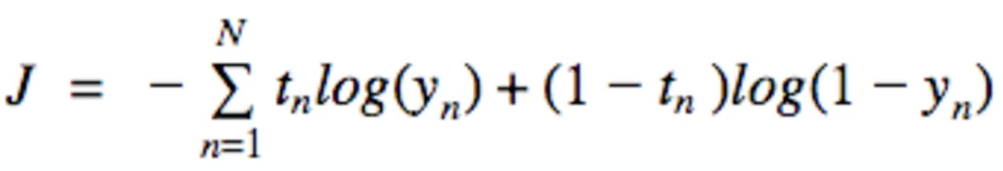

* Note: here the summation is because we need to find the error associated with **each training example** (N total)

---
# Updating the Weights using Gradient Descent - Theory
* So far we know how to initialize our weights randomly and use them in our classifier
* IF we assume that our data is Gaussian-distributed with equal covariance, we can use the Bayes method to find a solution for the weights!
* Generally speaking this isn't the case, and we want something that will work in general
* What did we do for linear regression? 
    * we took the squared error, calculated its derivative with respect to the weights, set it to 0, and solved for the weights
    * Note, in andrew NG course we did use gradient descent!
* However, now we are going to try...

# Gradient Descent
* For general gradient descent review, look at linear regression walk through notes, machine learning perspective
* Lets say we have an Cost/Error  curve, and we randomly initialize the weight to some point
* Suppose the derivative at this weight is -1, and the point is at -2 

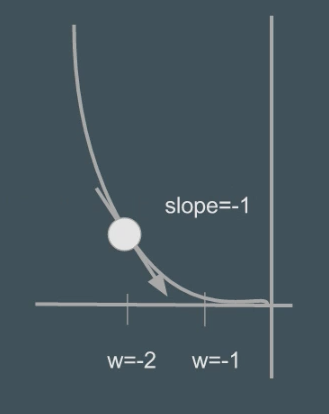

* note in graph above, thte y axis represents Cost, J, and we are trying to **minimize** that!
* The idea is that we want to take small steps in the direction of the derivative! 
* The step size is what we call the learning rate (we can set it to 1 for this example)
* So the update becomes:
### $$w = -2 -1*(-1) = -1$$
* Now we are closer to the optimal point! (w=0)
* Note, the derivate at the bottom is 0, so once we get there no more updates will occur
* This method can work for **ANY** objective function

# Gradient Descent for Logistic Regression 
* We want to find the derivative of J, with respect to each weight:

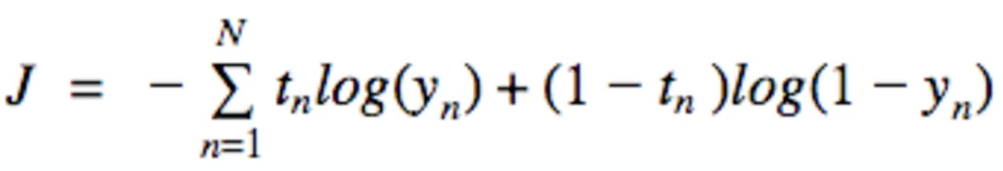

* Note: N represents all of our training examples!
* One convenient rule of calculus is the chain rule! So we don't need to do everything all at once 
* We can first find the derivative of J with respect to y
* then we can find the derivative of y with respect to some input to the sigmoid (sometimes called the activation, a in this case)
* We can find the derivative of a with respect to the weights 

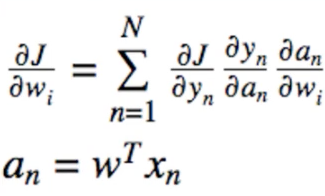

## Derivative of J with respect to y

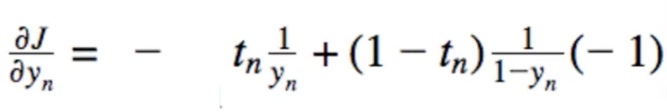

This is because the derivative of the log, is just 1 over the thing inside of it

## Derivative of the sigmoid 

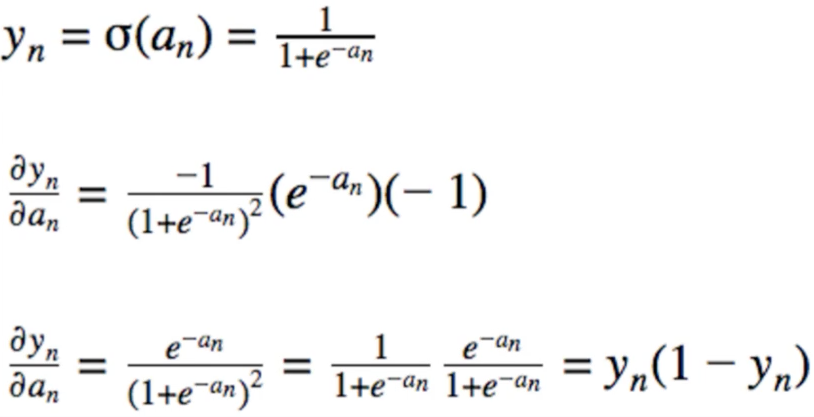

* First we want to use the division rule (so we get -1 over the thing on the bottom squared) (second line above)
* then we take the derivative of the thing on the bottom (second line above)
* Notice though, how in the third line we can express this all in terms of y

## Derivative of a with respect to w

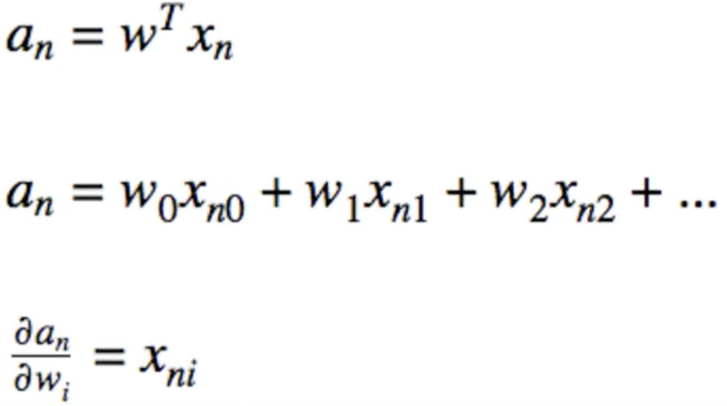

* To make this simple, lets just do this for one component of w, $w_i$

## Finally, we can put all of these together!

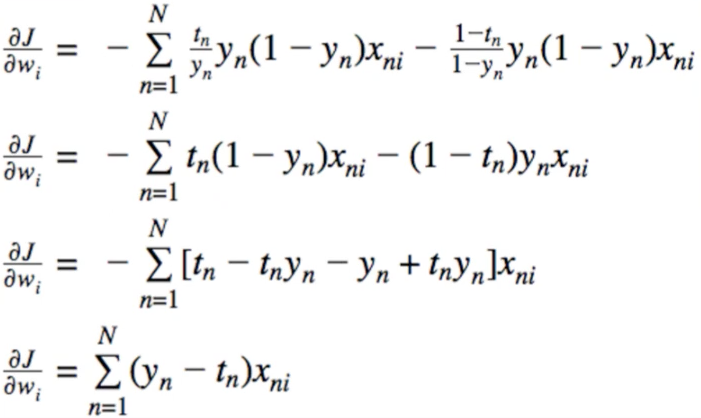

* Above we can see our final solution for the derivative of J, the cost/objective function, with respect to w, our weights!

## Vectorize
* Since each ith component on the left side only depends on the ith component on the right side, we can write this in vector form!

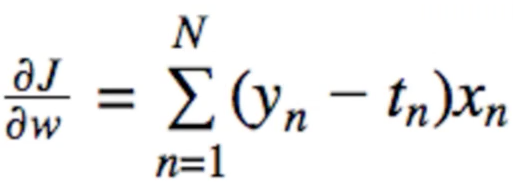

* This is more efficient, because in python using a numpy operation is faster than using a python for loop

## Vectorize more
* But we can still vectorize this further!
* Remember that the **dot product** is a summation of an index!

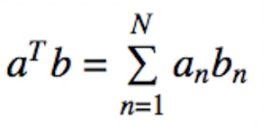

* Recall, **X** is an **N x D** matrix
* **Y and T** are both **N x 1**
* **w** is a **D x 1** matrix, so we want our result to be **D x 1**
* so if we do:
### $$X^T(Y-T) = (D \;x\; N)(N \;x \;1) = (N\;x\;1)$$
* This is the correct shape for w!
* and N then gets summed over

## Bias Term
* What happens with the bias term?
* In logistic regression, it is easy to incorporate the bias term into x itself, just by adding a column of ones
* But what if we want to find its derivative explicitally? 
* We can return to our original expression, and just remember that all the $x_0$ are 1 

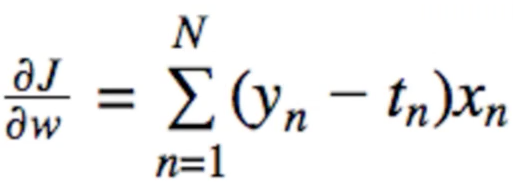

* This just gives us the sum over all y - t

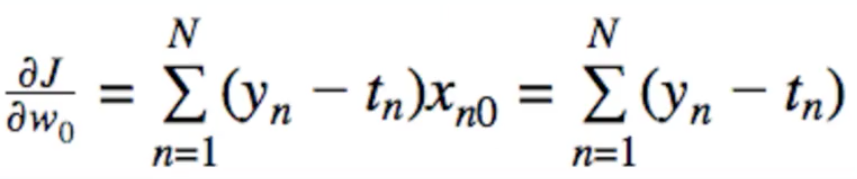


---
# Gradient Descent - updating the weights: Code 
* this isn't too difficult, since the derivative simplifies the relatively basic vector above! 

## Recap
* Below a lot of the code is being re-used from above, but for referrence:
    * we have 2 normally distributed classes 
    * one is centered at (-2, -2)
    * the other at (2, 2)
    * we create our X data, our targets
    * randomly initialize our weights
    * define our sigmoid function
    * make our predictions
    * calculate the over all cross entropy error

In [251]:
N = 100
D = 2 

X = np.random.randn(N,D)

X[:50, :] = X[:50, :] - 2*np.ones((50,D))
X[50:, :] = X[50:, :] + 2*np.ones((50,D))

T = np.array([0]*50+[1]*50)

ones = np.array([[1]*N]).T
Xb = np.concatenate((ones, X), axis=1)

w = np.random.randn(D + 1)

z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

def cross_entropy(T, Y): 
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

## New code
* Starting here is the new code that is used to train our weights/logistic regression model using gradient descent!

In [252]:
learning_rate = 0.1 

for i in range(100): 
    # print cross entropy every 10 steps to see that it is decreasing
    if i % 10 == 0:
        print(cross_entropy(T, Y))
        
        # updating our weights each iteration, the right hand side below is the derivation of the cost function
        w += learning_rate * Xb.T.dot(T - Y)
        Y = sigmoid(Xb.dot(w))
        
print("Final w:", w)

697.261661325
1.07503283171
0.982785074755
0.899623792425
0.824918842134
0.757979083879
0.698090304523
0.644545898438
0.596669397871
0.553829285311
Final w: [  0.06084089  18.30840058  16.79264341]


# We have our solution!
* Awesome, look at how close that is to the closed form solution! 
* note, these values could have been multiples of the closed form solution, something we will address. 

---
# E-commerce course project: Training the logistic Regression Model

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [254]:
def get_data():
    df = pd.read_csv('data/ecommerce_data.csv')
    data = df.as_matrix()
    
    # grabbing all rows, and all columns except the last one
    X = data[:, :-1]
    # grabbing all rows, and the last column
    Y = data[:, -1]
    
    # normalize
    X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()  
    X[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()  
    
    # get shape of X
    N, D = X.shape
    
    # create a new X, with additional columns for each time of day bucket
    X2 = np.zeros((N, D + 3))
    
    # grab all old columns (except time_of_day) from X and add to X2
    X2[:, 0:(D-1)] = X[:, 0:(D-1)]
    
    # one hot encoding for other 4 columns (for the time_of_day)
    # loop through every sample, get time of day (either 0, 1, 2, or 3)
    # set that value in X2 equal to 1
    for n in range(N):
        t = int(X[n, D-1])
        X2[n, t + D - 1] = 1
        
    return X2, Y

def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

In [255]:
X, Y = get_binary_data()

We now want to shuffle our data, just in case it was in order.

In [256]:
X, Y = shuffle(X, Y)

Now create a training and a test set. In this case we are withholding 100 samples.

In [257]:
Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

Randomly initialize the weights again.

In [258]:
D = X.shape[1]
W = np.random.randn(D)
b = 0

Define our sigmoid. 

In [259]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

Write our prediction function, named forward. 

In [260]:
def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

Write function to get classification rate.

In [261]:
def classification_rate(Y, P):
    return np.mean(Y == P)

## Now for the new code 
* everything above we already created in section 2
* now we are going to create something new that we have not seen
* The cross entropy
* Takes in the targets and pY, which is the probability of Y given X
* sums all over all of the training examples, and then divides by the number of training examples
* that is why we use `np.mean`, but note that the equations in this lecture do not show the division term (it should be there though)
* Why? If not, then scenarios where we simply have more examples would have a much higher cost! Dividing by the number of examples is a normalization 

In [262]:
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

### Now we can enter our main training loop.
* in each iteration of loop, we will calculate pYtrain
* Ytrain is our target in this case!

0 1.904079695 1.53250073295
1000 0.155270659022 0.279435705683
2000 0.153867999913 0.279854076743
3000 0.15370959603 0.280176825566
4000 0.153686859754 0.280355892837
5000 0.153683338568 0.280436081059
6000 0.153682777536 0.280469660712
7000 0.153682687148 0.280483392787
8000 0.153682672521 0.280488957924
9000 0.153682670149 0.280491205286
Final train classification rate: 0.976510067114
Final test classification rate: 0.95


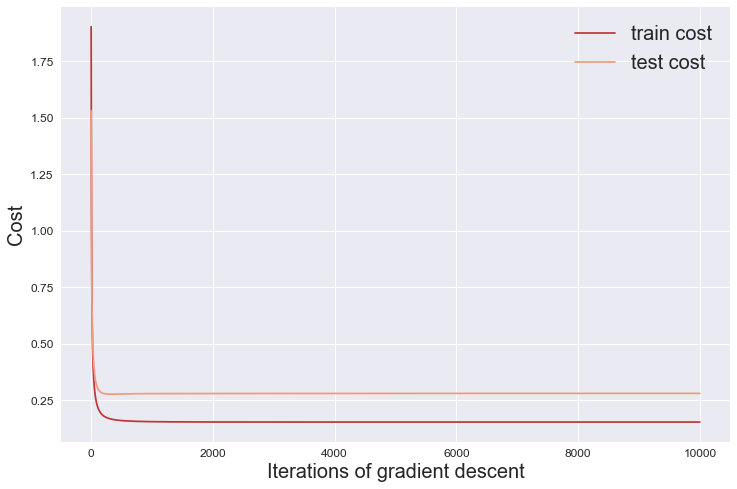

In [263]:
train_costs = []
test_costs = []
learning_rate = 0.001

# repeat the below process 10000 times
for i in range(10000):
    # calculate the predictions for the test and training set
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    # calculate the training and test cost, then append to the train and test cost array
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    # now we are ready to do gradient descent - this will be the vectorized version of these equations
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print ("Final train classification rate:", classification_rate(Ytrain, np.round(pYtrain)))
print ("Final test classification rate:", classification_rate(Ytest, np.round(pYtest)))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(train_costs, label='train cost')
plt.plot(test_costs, label='test cost')

# setting axes
ax.set_xlabel('Iterations of gradient descent', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
ax.tick_params(labelsize="large")
ax.legend(['train cost', 'test cost'], fontsize=20)
plt.show()